In [79]:
import pandas as pd
import numpy as np

In [80]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [81]:
test

,Total_Value,Year,Month,Day,Hour,Ventilation,Sokets_Plug,Lighting,Other_Electricity,Cooling,Heating
0,188.751,2021,5,21,13,53.500,23.313,33.188,61.625,9.875,7.25
1,83.001,2021,5,22,1,17.500,8.625,3.063,44.063,6.750,3.00
2,88.251,2021,5,22,4,7.250,10.563,7.313,46.000,10.375,6.75
3,80.750,2021,5,22,13,6.500,12.250,7.125,29.125,19.000,6.75
4,27.750,2021,5,22,17,2.250,6.375,3.500,0.000,11.375,4.25
...,...,...,...,...,...,...,...,...,...,...,...
139,328.688,2021,6,19,13,84.875,22.750,14.938,0.000,200.125,6.00
140,328.688,2021,6,19,20,84.875,22.750,14.938,0.000,200.125,6.00
141,328.688,2021,6,19,23,84.875,22.750,14.938,0.000,200.125,6.00
142,328.688,2021,6,20,8,84.875,22.750,14.938,0.000,200.125,6.00


In [82]:
x_train = train.iloc[:,0:5] 

y_train = train.iloc[:, 5:11]

x_test = test.iloc[:,0:5] 

y_test = test.iloc[:, 5:11]

In [83]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [84]:
x_test.drop('Year', inplace=True, axis=1)
x_train.drop('Year', inplace=True, axis=1)


In [85]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [86]:
# GENERATING THE SEQUENTIAL MODEL
model = Sequential()
model.add(Dense(20, input_dim=4, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(300, input_dim=300, activation='relu'))
model.add(Dense(6))
model.compile(loss='mae', optimizer='adam')

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 20)                100       
_________________________________________________________________
dense_21 (Dense)             (None, 300)               6300      
_________________________________________________________________
dense_22 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_23 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 1806      
Total params: 188,806
Trainable params: 188,806
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/500
16/16 [==============================] - 0s 5ms/step - loss: 29.0189 - val_loss: 25.9496
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 22.5781 - val_loss: 21.4505
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 19.9242 - val_loss: 19.8867
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 18.3498 - val_loss: 18.6143
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 15.6682 - val_loss: 15.6640
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 12.1560 - val_loss: 12.6931
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 11.1471 - val_loss: 11.9293
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 10.6309 - val_loss: 11.2735
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 10.1249 - val_loss: 11.0210
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 9.5850 - val_loss

Epoch 83/500
16/16 [==============================] - 0s 1ms/step - loss: 5.7755 - val_loss: 7.0527
Epoch 84/500
16/16 [==============================] - 0s 1ms/step - loss: 5.8896 - val_loss: 7.0234
Epoch 85/500
16/16 [==============================] - 0s 1ms/step - loss: 5.9071 - val_loss: 6.8641
Epoch 86/500
16/16 [==============================] - 0s 1ms/step - loss: 5.7754 - val_loss: 6.6901
Epoch 87/500
16/16 [==============================] - 0s 1ms/step - loss: 5.6725 - val_loss: 6.6986
Epoch 88/500
16/16 [==============================] - 0s 1ms/step - loss: 5.8284 - val_loss: 6.8742
Epoch 89/500
16/16 [==============================] - 0s 1ms/step - loss: 5.7471 - val_loss: 6.5898
Epoch 90/500
16/16 [==============================] - 0s 1ms/step - loss: 5.6673 - val_loss: 6.8869
Epoch 91/500
16/16 [==============================] - 0s 1ms/step - loss: 5.7658 - val_loss: 6.8509
Epoch 92/500
16/16 [==============================] - 0s 1ms/step - loss: 5.7630 - val_loss: 6.6556


16/16 [==============================] - 0s 1ms/step - loss: 5.0774 - val_loss: 6.5320
Epoch 165/500
16/16 [==============================] - 0s 1ms/step - loss: 5.0989 - val_loss: 6.8253
Epoch 166/500
16/16 [==============================] - 0s 1ms/step - loss: 5.0853 - val_loss: 6.8528
Epoch 167/500
16/16 [==============================] - 0s 1ms/step - loss: 4.9918 - val_loss: 7.1619
Epoch 168/500
16/16 [==============================] - 0s 1ms/step - loss: 5.1690 - val_loss: 6.5929
Epoch 169/500
16/16 [==============================] - 0s 1ms/step - loss: 5.1525 - val_loss: 6.8978
Epoch 170/500
16/16 [==============================] - 0s 1ms/step - loss: 5.0793 - val_loss: 7.1858
Epoch 171/500
16/16 [==============================] - 0s 1ms/step - loss: 5.1478 - val_loss: 6.6986
Epoch 172/500
16/16 [==============================] - 0s 1ms/step - loss: 5.0824 - val_loss: 6.9282
Epoch 173/500
16/16 [==============================] - 0s 1ms/step - loss: 4.9391 - val_loss: 6.8069
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 4.9407 - val_loss: 7.1055
Epoch 246/500
16/16 [==============================] - 0s 1ms/step - loss: 4.7409 - val_loss: 6.8871
Epoch 247/500
16/16 [==============================] - 0s 1ms/step - loss: 4.5596 - val_loss: 6.8996
Epoch 248/500
16/16 [==============================] - 0s 1ms/step - loss: 4.6118 - val_loss: 7.2093
Epoch 249/500
16/16 [==============================] - 0s 1ms/step - loss: 4.6178 - val_loss: 6.9540
Epoch 250/500
16/16 [==============================] - 0s 1ms/step - loss: 4.5098 - val_loss: 7.1448
Epoch 251/500
16/16 [==============================] - 0s 1ms/step - loss: 4.6001 - val_loss: 7.2274
Epoch 252/500
16/16 [==============================] - 0s 2ms/step - loss: 4.6293 - val_loss: 6.7567
Epoch 253/500
16/16 [==============================] - 0s 1ms/step - loss: 4.6012 - val_loss: 6.8795
Epoch 254/500
16/16 [==============================] - 0s 2ms/step - loss: 4.6756 - val_loss: 6.8897
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 4.3237 - val_loss: 7.2973
Epoch 327/500
16/16 [==============================] - 0s 1ms/step - loss: 4.3429 - val_loss: 7.3598
Epoch 328/500
16/16 [==============================] - 0s 1ms/step - loss: 4.2608 - val_loss: 7.6434
Epoch 329/500
16/16 [==============================] - 0s 1ms/step - loss: 4.4699 - val_loss: 7.6761
Epoch 330/500
16/16 [==============================] - 0s 1ms/step - loss: 4.2531 - val_loss: 6.9782
Epoch 331/500
16/16 [==============================] - 0s 1ms/step - loss: 4.2453 - val_loss: 7.5550
Epoch 332/500
16/16 [==============================] - 0s 1ms/step - loss: 4.2930 - val_loss: 6.9077
Epoch 333/500
16/16 [==============================] - 0s 1ms/step - loss: 4.4285 - val_loss: 7.1861
Epoch 334/500
16/16 [==============================] - 0s 1ms/step - loss: 4.2922 - val_loss: 7.0638
Epoch 335/500
16/16 [==============================] - 0s 1ms/step - loss: 4.2715 - val_loss: 7.0597
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 3.9737 - val_loss: 7.1325
Epoch 408/500
16/16 [==============================] - 0s 1ms/step - loss: 3.9985 - val_loss: 7.2632
Epoch 409/500
16/16 [==============================] - 0s 1ms/step - loss: 4.0268 - val_loss: 7.0765
Epoch 410/500
16/16 [==============================] - 0s 1ms/step - loss: 3.9505 - val_loss: 7.2425
Epoch 411/500
16/16 [==============================] - 0s 1ms/step - loss: 3.8787 - val_loss: 7.6300
Epoch 412/500
16/16 [==============================] - 0s 1ms/step - loss: 3.8867 - val_loss: 6.9538
Epoch 413/500
16/16 [==============================] - 0s 1ms/step - loss: 3.8719 - val_loss: 7.5524
Epoch 414/500
16/16 [==============================] - 0s 1ms/step - loss: 3.7901 - val_loss: 7.3054
Epoch 415/500
16/16 [==============================] - 0s 1ms/step - loss: 3.8392 - val_loss: 7.4194
Epoch 416/500
16/16 [==============================] - 0s 1ms/step - loss: 3.8265 - val_loss: 7.1596
Epoc

16/16 [==============================] - 0s 1ms/step - loss: 3.6531 - val_loss: 7.4359
Epoch 489/500
16/16 [==============================] - 0s 1ms/step - loss: 3.4970 - val_loss: 7.6616
Epoch 490/500
16/16 [==============================] - 0s 1ms/step - loss: 3.5482 - val_loss: 7.5897
Epoch 491/500
16/16 [==============================] - 0s 1ms/step - loss: 3.6786 - val_loss: 7.6187
Epoch 492/500
16/16 [==============================] - 0s 1ms/step - loss: 3.6116 - val_loss: 7.8071
Epoch 493/500
16/16 [==============================] - 0s 1ms/step - loss: 3.5851 - val_loss: 7.5653
Epoch 494/500
16/16 [==============================] - 0s 1ms/step - loss: 3.5839 - val_loss: 7.4491
Epoch 495/500
16/16 [==============================] - 0s 1ms/step - loss: 3.6181 - val_loss: 7.8498
Epoch 496/500
16/16 [==============================] - 0s 1ms/step - loss: 3.5255 - val_loss: 7.5086
Epoch 497/500
16/16 [==============================] - 0s 1ms/step - loss: 3.5484 - val_loss: 7.5319
Epoc

In [89]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (20,15)
mpl.rcParams['axes.grid'] = False

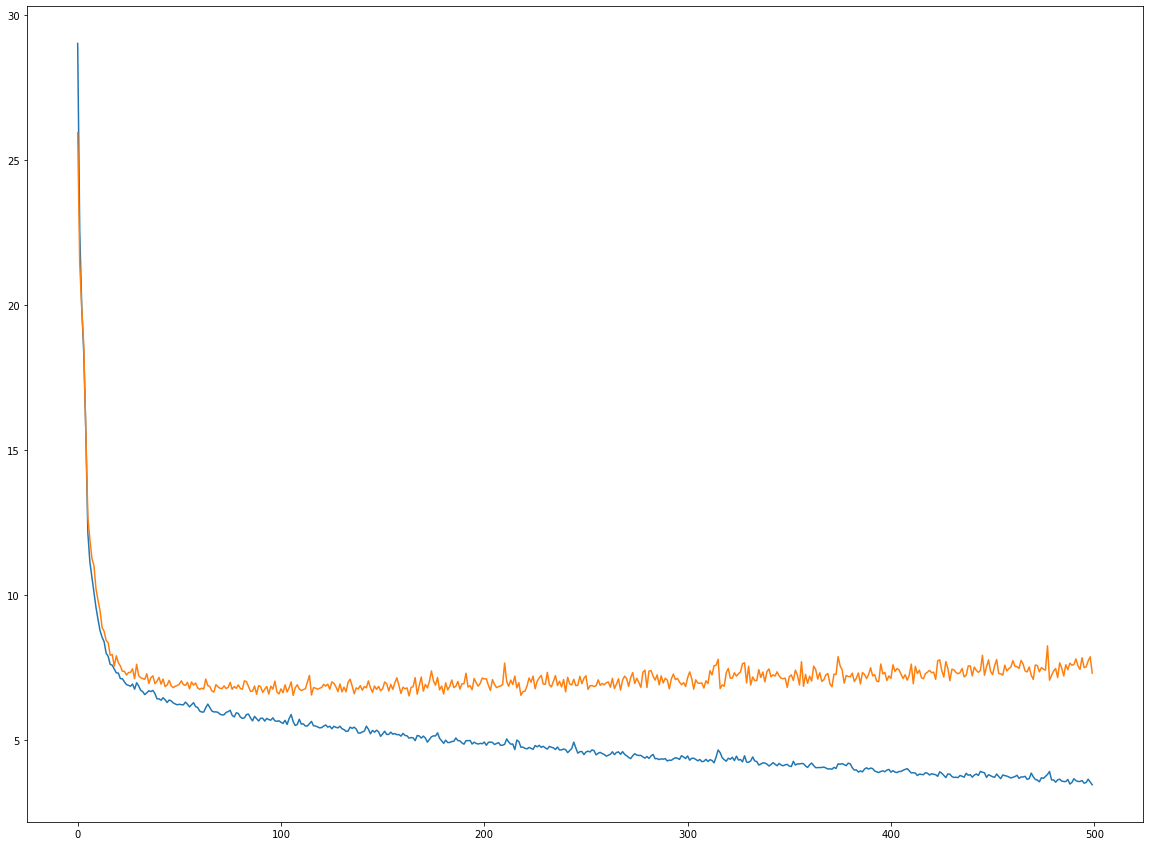

In [90]:
# PLOTTING THE GRAPH
plt.plot(history.history['loss'], label='train') #plot the loss
plt.plot(history.history['val_loss'], label='validation') #plot the validation loss


In [91]:
pred = model.predict(x_test)

In [92]:
# pred

In [93]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test['Ventilation']
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

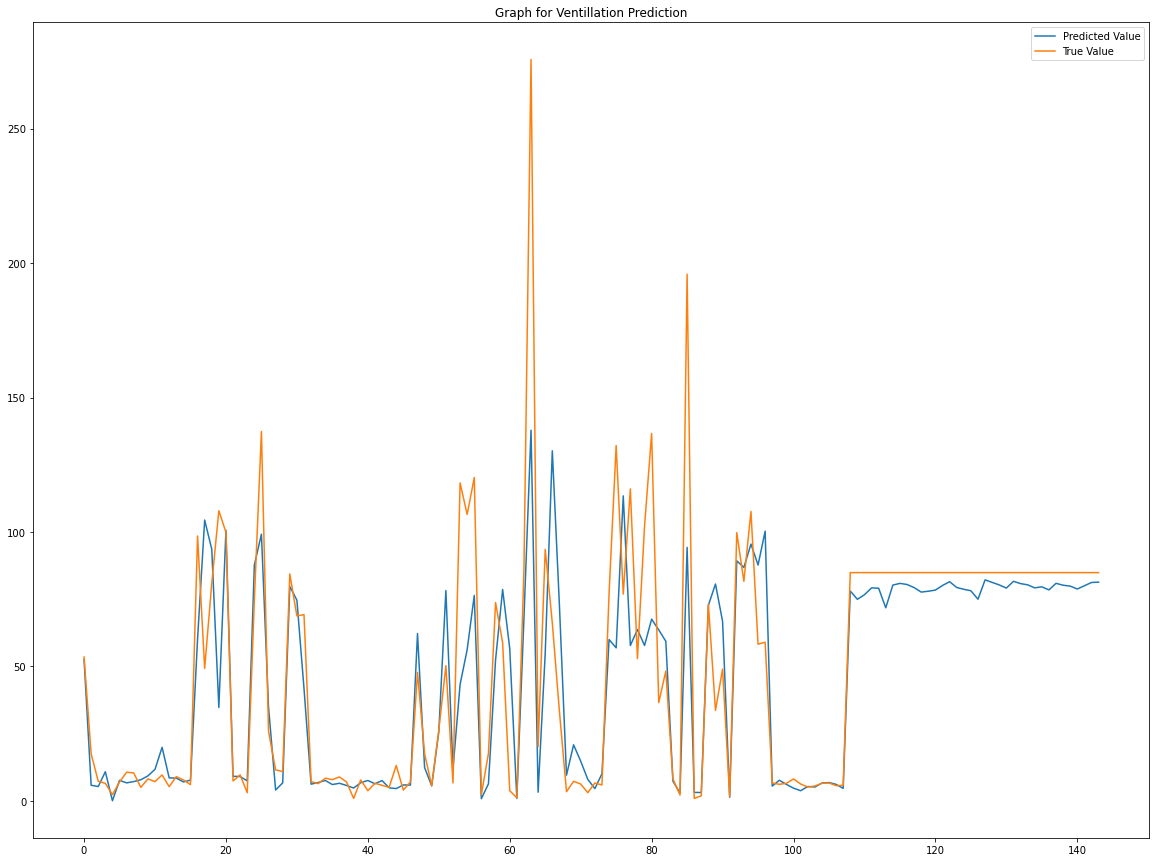

In [94]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [95]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test['Sokets_Plug']
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

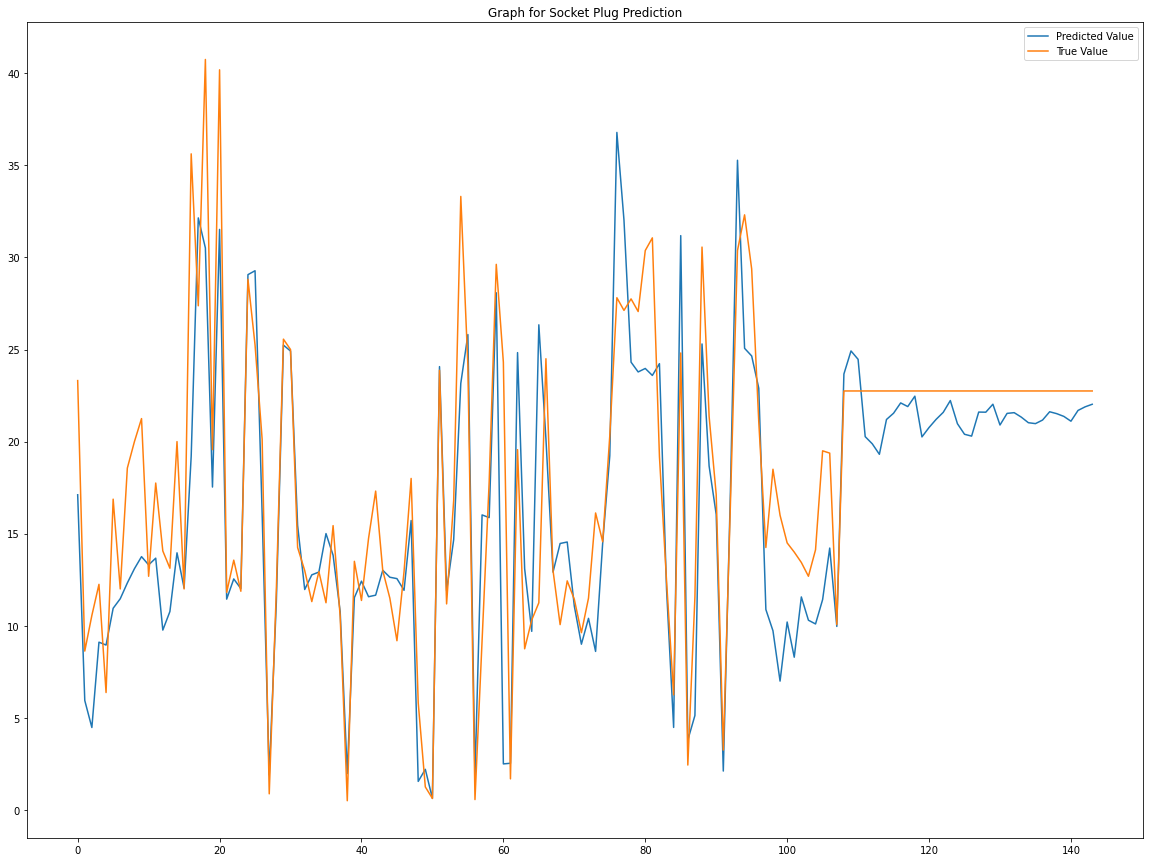

In [96]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [97]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test['Lighting']
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

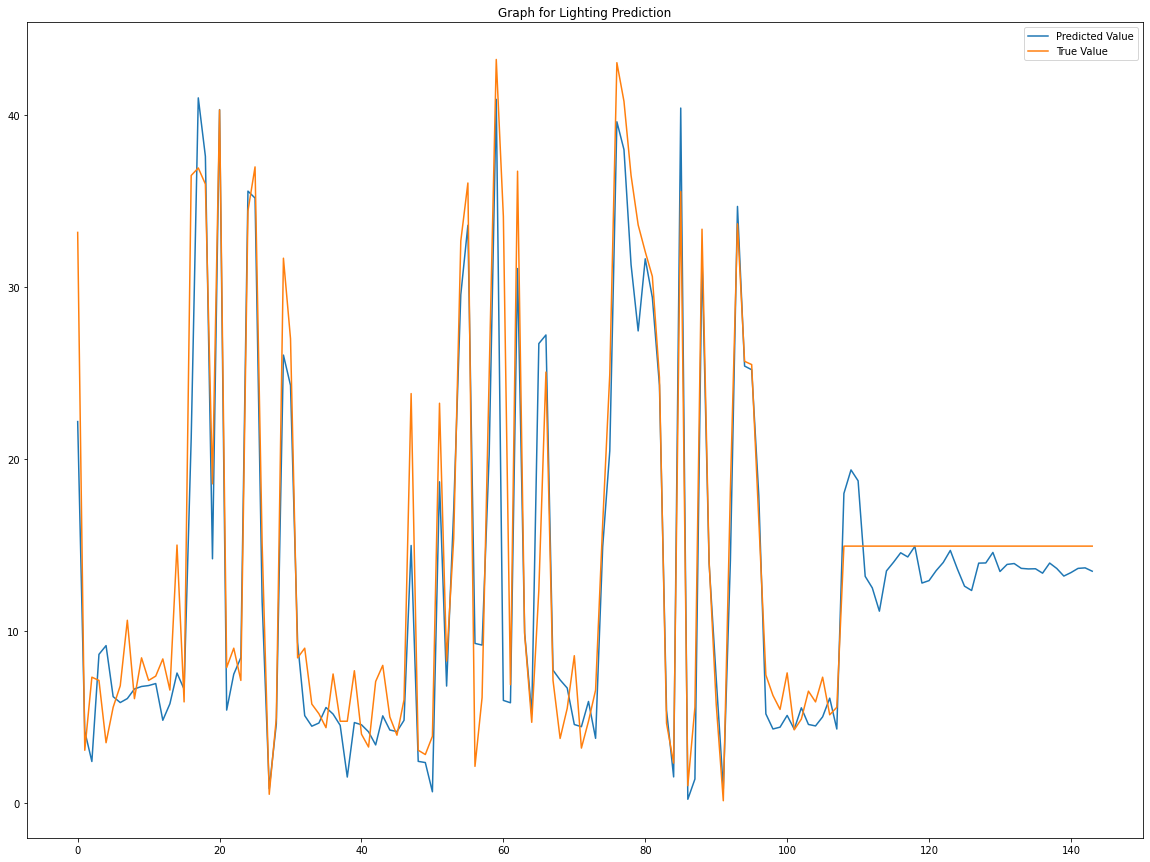

In [98]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [99]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test['Other_Electricity']
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

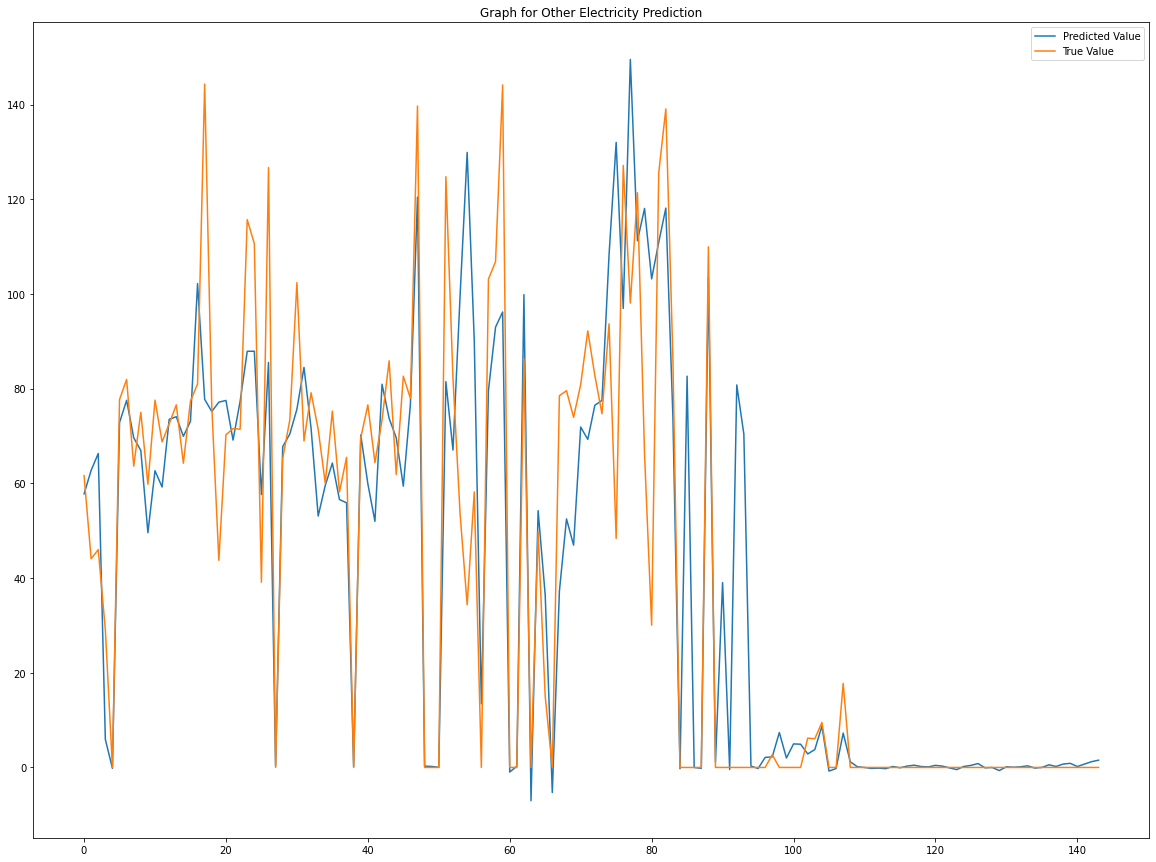

In [100]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [101]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test['Cooling']
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

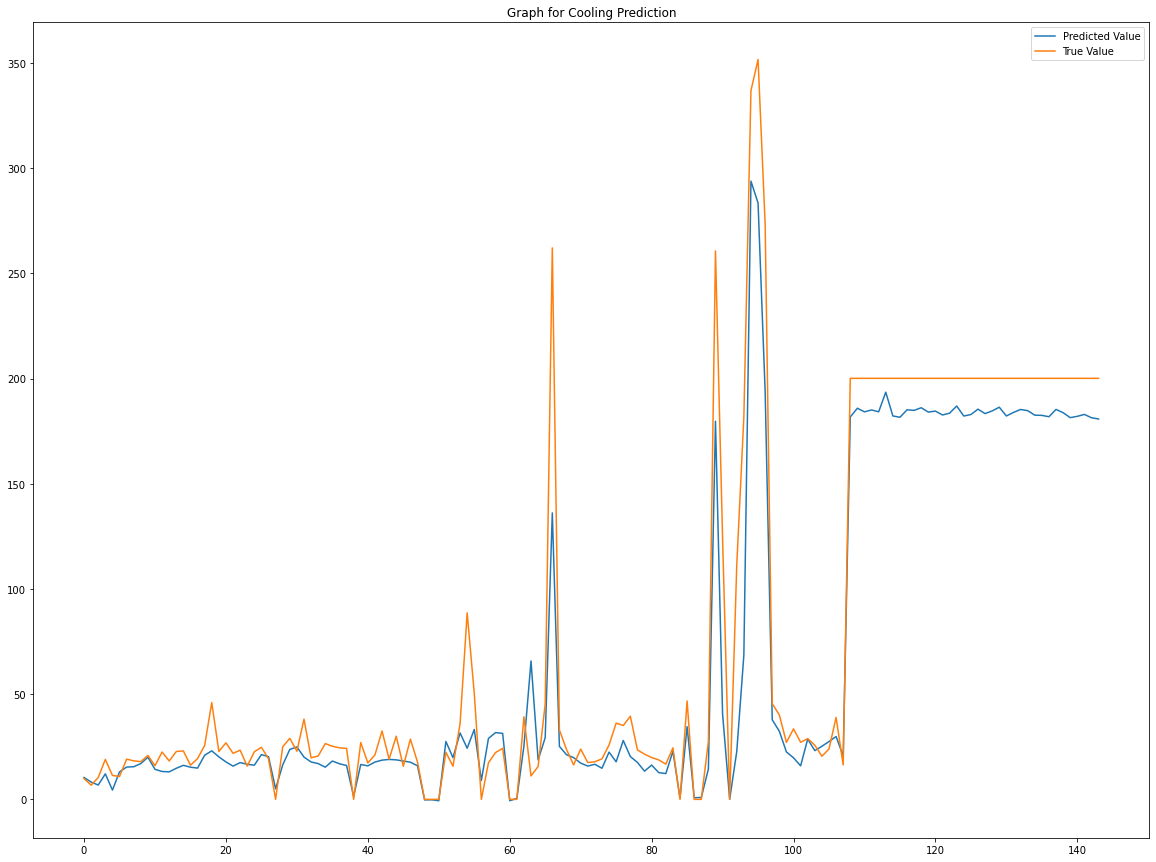

In [102]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [103]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test['Heating']
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

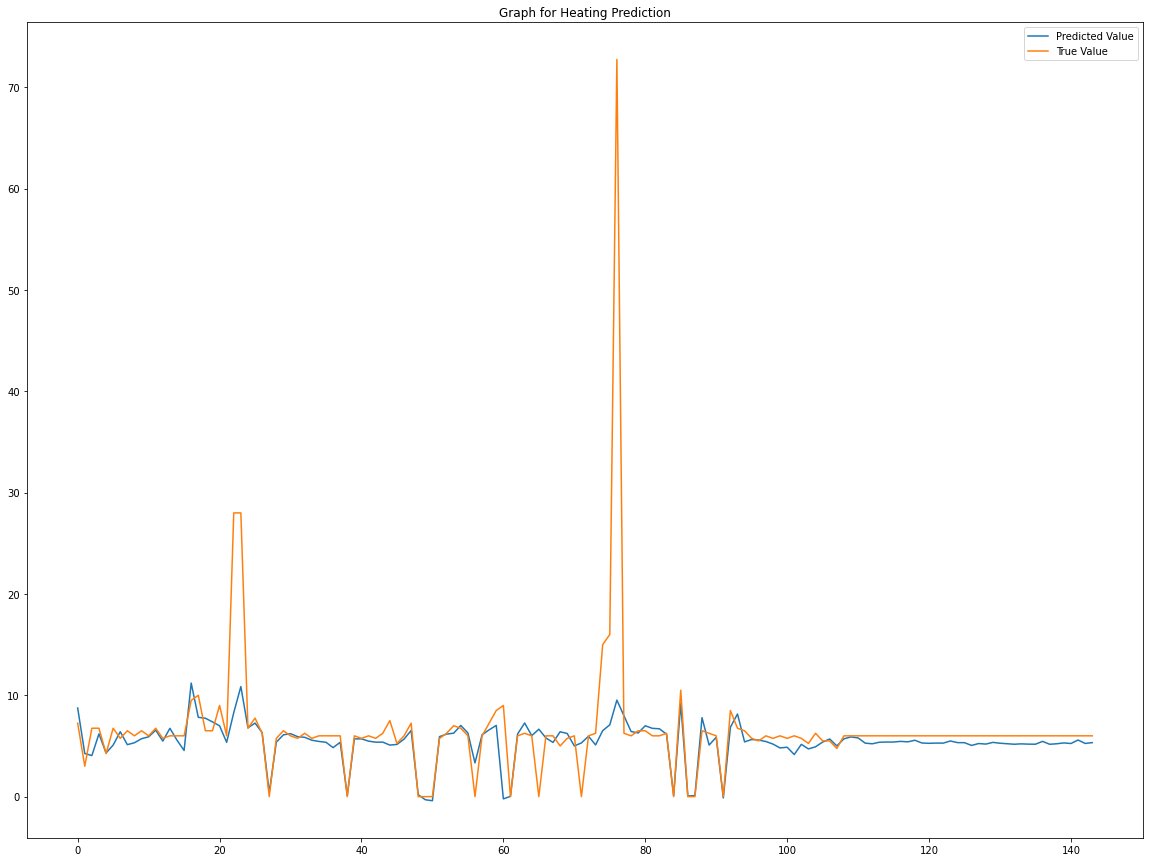

In [104]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')